In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
X_data = pd.read_csv("linearX.csv", header=None).values.flatten()
y_data = pd.read_csv("linearY.csv", header=None).values.flatten()


### Normalize the data before training.

In [84]:
X = (X_data - np.mean(X_data)) / np.std(X_data)
y = (y_data - np.mean(y_data)) / np.std(y_data)

X = np.c_[np.ones(X.shape[0]), X]

Q_1

In [85]:
theta = np.zeros((2, 1)) 
learning_rate = 0.5
iterations = 50

### Cost Function

In [86]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y.reshape(-1, 1)) ** 2)
    return cost

### Gradient Descent

In [87]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y.reshape(-1, 1)
        gradients = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [88]:
final_theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

### Q_3

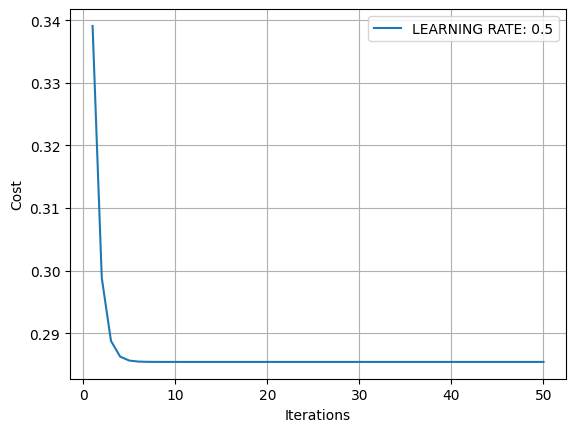

In [89]:
plt.plot(range(1, iterations + 1), cost_history, label="LEARNING RATE: 0.5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.legend()
plt.show()

## Q_4

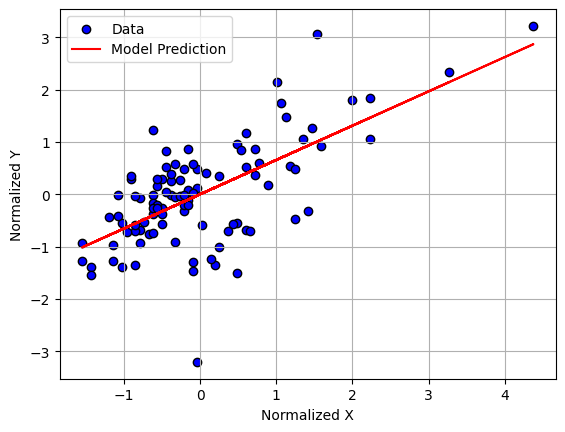

In [90]:
plt.scatter(X[:, 1], y, label="Data", color="blue", edgecolor="black")
predictions = X.dot(final_theta)
plt.plot(X[:, 1], predictions, color="red", label="Model Prediction")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.legend()
plt.grid(True)
plt.show()

### Q_1

In [91]:
print("Final Parameters (Theta):", final_theta.flatten())
print("Final Cost:", cost_history[-1])

Final Parameters (Theta): [-5.99287286e-14  6.55064426e-01]
Final Cost: 0.2854452986624983


### Q_5 

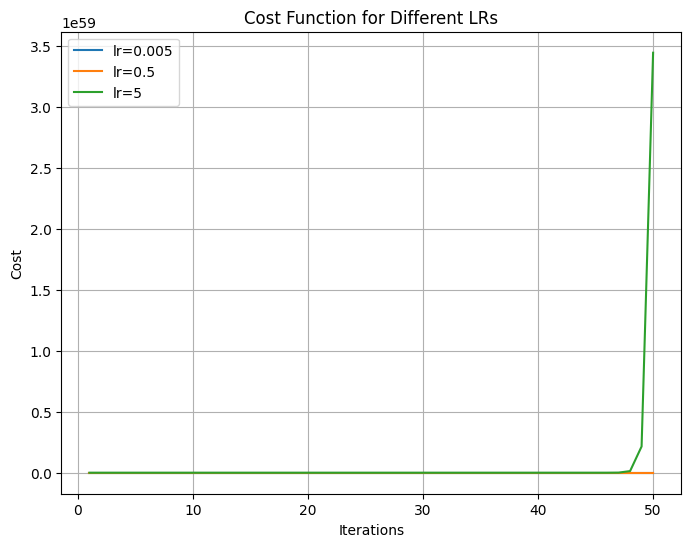

In [92]:
learning_rates = [0.005, 0.5, 5]
plt.figure(figsize=(8, 6))

for lr in learning_rates:
    theta = np.zeros((2, 1))
    _, costs = gradient_descent(X, y, theta, learning_rate=lr, iterations=50)
    plt.plot(range(1, 51), costs, label=f"lr={lr}")

plt.title("Cost Function for Different LRs")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

## Q_6

### Stochastic Gradient Descent

In [93]:
def stochastic_gradient_descent(x, y, learning_rate, iterations):
    theta0, theta1 = 0, 0
    m = len(y)
    costs = []
    for _ in range(iterations):
        for i in range(m):
            xi, yi = x[i], y[i]
            h = theta0 + theta1 * xi
            d_theta0 = h - yi
            d_theta1 = (h - yi) * xi
            theta0 -= learning_rate * d_theta0
            theta1 -= learning_rate * d_theta1
        cost = (1 / (2 * m)) * np.sum((theta0 + theta1 * x - y) ** 2)
        costs.append(cost)
    return theta0, theta1, costs

### Mini-batch Gradient Descent

In [94]:
def mini_batch_gradient_descent(x, y, learning_rate, iterations, batch_size=10):
    theta0, theta1 = 0, 0
    m = len(y)
    costs = []
    for _ in range(iterations):
        for i in range(0, m, batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            h = theta0 + theta1 * x_batch
            d_theta0 = (1 / len(y_batch)) * np.sum(h - y_batch)
            d_theta1 = (1 / len(y_batch)) * np.sum((h - y_batch) * x_batch)
            theta0 -= learning_rate * d_theta0
            theta1 -= learning_rate * d_theta1
        cost = (1 / (2 * m)) * np.sum((theta0 + theta1 * x - y) ** 2)
        costs.append(cost)
    return theta0, theta1, costs

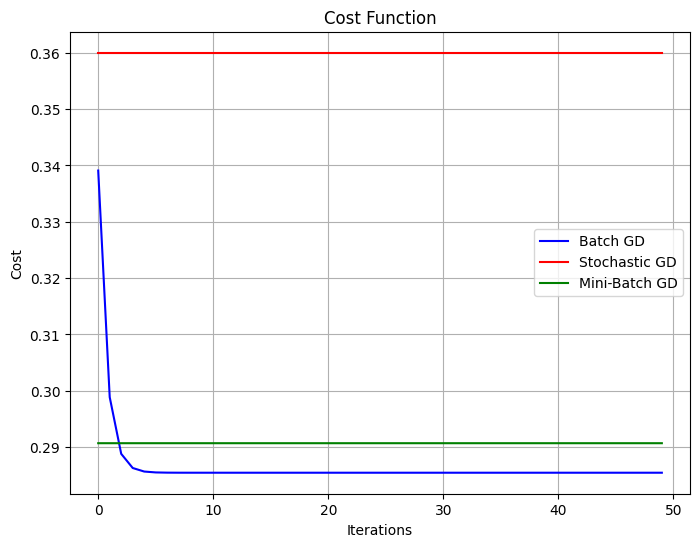

In [95]:
theta, costs_batch = gradient_descent(X, y, np.zeros((2, 1)), learning_rate=learning_rate, iterations=iterations)
theta0_sgd, theta1_sgd, costs_sgd = stochastic_gradient_descent(X[:, 1], y, learning_rate=learning_rate, iterations=iterations)
theta0_mbgd, theta1_mbgd, costs_mbgd = mini_batch_gradient_descent(X[:, 1], y, learning_rate=learning_rate, iterations=iterations)

plt.figure(figsize=(8, 6))

plt.plot(range(len(costs_batch)), costs_batch, label="Batch GD", color="blue")
plt.plot(range(len(costs_sgd)), costs_sgd, label="Stochastic GD", color="red")
plt.plot(range(len(costs_mbgd)), costs_mbgd, label="Mini-Batch GD", color="green")

plt.title("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()